In [119]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from rapidfuzz import fuzz
from collections import defaultdict

In [120]:
with open("../data/professores.json", encoding="utf-8") as f:
    professores = json.load(f)

In [121]:
def calcular_proximidade(professores):
    resultados = []
    for prof in professores:
        nome = prof["identificacao"]["nome"]
        nomes_citacao = prof["identificacao"].get("nomes_citacao", [])
        for nome_citacao in nomes_citacao:
            score = fuzz.token_set_ratio(nome, nome_citacao)
            resultados.append(
                {"nome": nome, "nome_citacao": nome_citacao, "proximidade": score}
            )
    return resultados

In [122]:
resultados = calcular_proximidade(professores)

In [123]:
for r in resultados[: len(resultados)]:
    print(r)

{'nome': 'Adriana Carla Damasceno', 'nome_citacao': 'DAMASCENO, ADRIANA C.', 'proximidade': 22.727272727272734}
{'nome': 'Adriana Carla Damasceno', 'nome_citacao': 'ADRIANA DAMASCENO', 'proximidade': 15.0}
{'nome': 'Adriana Carla Damasceno', 'nome_citacao': 'DAMASCENO, A. C.', 'proximidade': 25.641025641025635}
{'nome': 'Adriana Carla Damasceno', 'nome_citacao': 'DAMASCENO, ADRIANA', 'proximidade': 14.63414634146342}
{'nome': 'Alan Kelon Oliveira de Moraes', 'nome_citacao': 'MORAES, A.', 'proximidade': 20.51282051282051}
{'nome': 'Alan Kelon Oliveira de Moraes', 'nome_citacao': 'MORAES, ALAN', 'proximidade': 19.512195121951223}
{'nome': 'Alan Kelon Oliveira de Moraes', 'nome_citacao': 'MORAES, A. K. O.', 'proximidade': 31.111111111111114}
{'nome': 'Alisson Vasconcelos de Brito', 'nome_citacao': 'BRITO, ALISSON V.', 'proximidade': 22.22222222222223}
{'nome': 'Alisson Vasconcelos de Brito', 'nome_citacao': 'BRITO, ALISSON V', 'proximidade': 22.727272727272734}
{'nome': 'Alisson Vasconcel

In [124]:
nome_professor = "Teobaldo Leite Bulhões Júnior"
dados_prof = [r for r in resultados if r["nome"] == nome_professor]
nomes = [nome_professor] + [d["nome_citacao"] for d in dados_prof]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(nomes)


pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

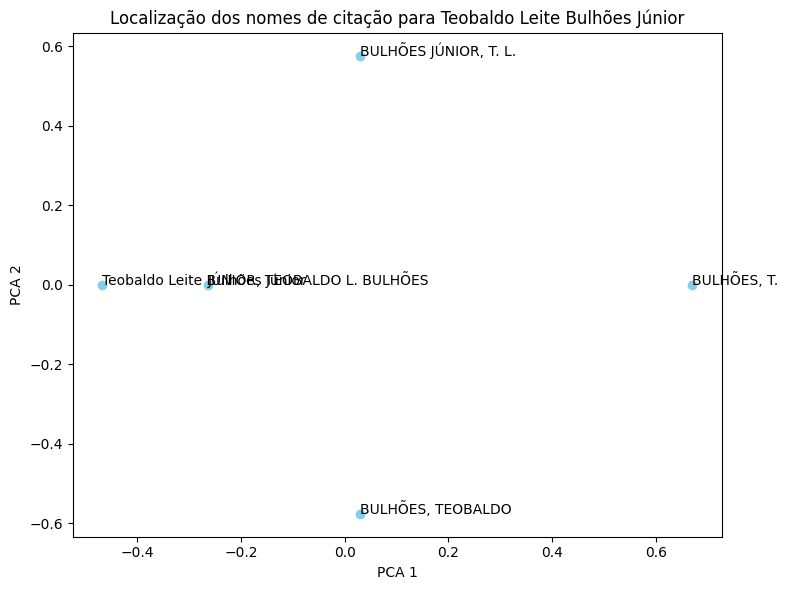

In [125]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], color="skyblue")
for i, nome in enumerate(nomes):
    plt.text(X_2d[i, 0], X_2d[i, 1], nome, fontsize=10)
plt.title(f"Localização dos nomes de citação para {nome_professor}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

In [126]:
grupos = defaultdict(list)
for prof in professores:
    nome = prof["identificacao"]["nome"]
    grupos[nome[0].upper()].append(prof)

for letra, grupo in grupos.items():
    nomes = []
    for prof in grupo:
        nome_professor = prof["identificacao"]["nome"]
        nomes.append(nome_professor)
        nomes += prof["identificacao"].get("nomes_citacao", [])
    if len(nomes) < 2:
        continue

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(nomes)
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X.toarray())

    fig = px.scatter(
        x=X_2d[:, 0],
        y=X_2d[:, 1],
        text=nomes,
        labels={"x": "PCA 1", "y": "PCA 2"},
        title=f"Localização dos nomes de citação - Professores com '{letra}'",
    )
    fig.update_traces(marker=dict(size=10), textposition='top center', hovertemplate='%{text}')
    fig.show()

    print(f"\nProfessores e nomes de citação do grupo '{letra}':")
    idx = 0
    for prof in grupo:
        nome_professor = prof["identificacao"]["nome"]
        print(f"- {nome_professor}  (PCA: {X_2d[idx, 0]:.3f}, {X_2d[idx, 1]:.3f})")
        idx += 1
        nomes_citacao = prof["identificacao"].get("nomes_citacao", [])
        for nome_citacao in nomes_citacao:
            print(f"    • {nome_citacao}  (PCA: {X_2d[idx, 0]:.3f}, {X_2d[idx, 1]:.3f})")
            idx += 1


Professores e nomes de citação do grupo 'A':
- Adriana Carla Damasceno  (PCA: -0.057, -0.280)
    • DAMASCENO, ADRIANA C.  (PCA: -0.063, -0.314)
    • ADRIANA DAMASCENO  (PCA: -0.063, -0.314)
    • DAMASCENO, A. C.  (PCA: -0.056, -0.273)
    • DAMASCENO, ADRIANA  (PCA: -0.063, -0.314)
- Alan Kelon Oliveira de Moraes  (PCA: -0.101, -0.060)
    • MORAES, A.  (PCA: -0.052, -0.192)
    • MORAES, ALAN  (PCA: -0.052, -0.184)
    • MORAES, A. K. O.  (PCA: -0.052, -0.192)
- Alisson Vasconcelos de Brito  (PCA: 0.649, 0.362)
    • BRITO, ALISSON V.  (PCA: 0.759, 0.193)
    • BRITO, ALISSON V  (PCA: 0.759, 0.193)
    • ALISSON, V.B.  (PCA: 0.528, 0.104)
    • VASCONCELOS BRITO, ALISSON  (PCA: 0.793, 0.226)
    • BRITO, ALISSON  (PCA: 0.759, 0.193)
    • BRITO, ALISSON VASCONCELOS DE  (PCA: 0.649, 0.362)
    • ALISSON VASCONCELOS BRITO  (PCA: 0.793, 0.226)
    • BRITO, ALISSON VASCONCELOS  (PCA: 0.793, 0.226)
    • DE BRITO, ALISSON VASCONCELOS  (PCA: 0.649, 0.362)
    • BRITO, A. V.  (PCA: 0.528


Professores e nomes de citação do grupo 'B':
- Bruno Jefferson de Sousa Pessoa  (PCA: -0.619, -0.409)
    • PESSOA, BRUNO J.S.  (PCA: -0.398, 0.511)
    • PESSOA, BRUNO JEFFERSON DE S.  (PCA: -0.591, -0.232)
    • PESSOA, BRUNO JEFFERSON DE SOUSA  (PCA: -0.619, -0.409)
    • PESSOA, B. J. S.  (PCA: -0.554, 0.667)
- Bruno Petrato Bruck  (PCA: 0.539, -0.021)
    • BRUCK, BRUNO P.  (PCA: 0.542, -0.036)
    • BRUCK, BRUNO  (PCA: 0.542, -0.036)
    • BRUCK, B.P.  (PCA: 0.620, -0.015)
    • BRUCK, BRUNO PETRATO  (PCA: 0.539, -0.021)



Professores e nomes de citação do grupo 'C':
- Camila Mara Vital Barros  (PCA: -0.202, 0.819)
    • BARROS, CAMILA  (PCA: -0.188, 0.721)
    • BARROS, CAMILA MARA VITAL  (PCA: -0.202, 0.819)
    • MARA VITAL BARROS, CAMILA  (PCA: -0.202, 0.819)
    • BARROS, C. M. V.  (PCA: -0.169, 0.598)
- Carlos Alberto Nunes Machado  (PCA: -0.278, 0.032)
    • MACHADO, C. A. N.  (PCA: -0.148, 0.150)
    • MACHADO, CARLOS ALBERTO NUNES  (PCA: -0.278, 0.032)
- Carlos Eduardo Coelho Freire Batista  (PCA: -0.592, -0.425)
    • BATISTA, CARLOS EDUARDO  (PCA: -0.591, -0.411)
    • BATISTA, CARLOS EDUARDO FREIRE  (PCA: -0.599, -0.427)
    • BATISTA, CARLOS E. C. F.  (PCA: -0.566, -0.373)
    • BATISTA, CARLOS EDUARDO COELHO FREIRE  (PCA: -0.592, -0.425)
    • BATISTA, C. E. C. F.  (PCA: -0.450, -0.270)
    • EDUARDO COELHO FREIRE BATISTA, CARLOS  (PCA: -0.592, -0.425)
    • BATISTA, CARLOS  (PCA: -0.566, -0.373)
- Christian Azambuja Pagot  (PCA: -0.129, 0.223)
    • PAGOT, C. A.  (PCA: -0.127, 0.217)
    


Professores e nomes de citação do grupo 'D':
- Daniela Coelho Batista Guedes Pereira  (PCA: -0.057, 0.768)
    • DANIELA COELHO BATISTA  (PCA: -0.058, 0.802)
    • DANIELA COELHO FREIRE BATISTA  (PCA: -0.056, 0.747)
    • BATISTA, D. C. F  (PCA: -0.050, 0.608)
    • DANIELA C. B. G. PEREIRA  (PCA: -0.049, 0.572)
- Danielle Rousy Dias Ricarte  (PCA: -0.671, -0.330)
    • RICARTE, DANIELLE R. D.  (PCA: -0.587, -0.246)
    • SILVA, DANIELLE  (PCA: -0.292, 0.112)
    • DANIELLE ROUSY D. RICARTE  (PCA: -0.656, -0.314)
    • SILVA, D. R. D.  (PCA: -0.104, 0.279)
    • RICARTE, D. R. D  (PCA: -0.466, -0.164)
    • RICARTE, DANIELLE ROUSY DIAS  (PCA: -0.671, -0.330)
    • DANIELLE ROUSY DIAS RICARTE  (PCA: -0.671, -0.330)
    • ROUSY DIAS DA SILVA, DANIELLE  (PCA: -0.408, -0.032)
    • ROUSY DIAS RICARTE, DANIELLE  (PCA: -0.671, -0.330)
    • RICARTE, DANIELLE ROUSY D.  (PCA: -0.656, -0.314)
    • RICARTE, D. R. D.  (PCA: -0.466, -0.164)
- Davi Henrique dos Santos  (PCA: 0.588, -0.208)
    • 


Professores e nomes de citação do grupo 'E':
- Ed Porto Bezerra  (PCA: 0.619, -0.111)
    • BEZERRA, ED  (PCA: 0.553, -0.092)
    • ED PORTO  (PCA: 0.444, -0.065)
    • BEZERRA ED  (PCA: 0.553, -0.092)
    • PORTO, ED  (PCA: 0.444, -0.065)
    • ED BEZERRA  (PCA: 0.553, -0.092)
    • ED PORTO BEZERRA  (PCA: 0.619, -0.111)
    • BEZERRA, E. P.  (PCA: 0.335, -0.030)
    • BEZERRA, ED PORTO  (PCA: 0.619, -0.111)
- Elizabet Maria Spohr de Medeiros  (PCA: -0.227, 0.190)
    • MEDEIROS, E. M. S.  (PCA: -0.227, 0.190)
- Eudisley Gomes dos Anjos  (PCA: -0.695, -0.478)
    • ANJOS, EUDISLEY  (PCA: -0.623, -0.384)
    • GOMES DOS ANJOS, EUDISLEY  (PCA: -0.695, -0.478)
    • ANJOS, E. G.  (PCA: -0.531, -0.275)
    • ANJOS, EUDISLEY GOMES DOS  (PCA: -0.695, -0.478)
- Ewerton Monteiro Salvador  (PCA: -0.354, 0.849)
    • SALVADOR, EWERTON MONTEIRO  (PCA: -0.354, 0.849)
    • SALVADOR, EWERTON M.  (PCA: -0.339, 0.786)



Professores e nomes de citação do grupo 'F':
- Felipe Antonio Garcia Moreno  (PCA: -0.613, -0.291)
    • MORENO, FELIPE GARCIA  (PCA: -0.665, -0.328)
    • MORENO, FELIPE A. G.  (PCA: -0.656, -0.319)
    • MORENO, F. A. G.  (PCA: -0.555, -0.244)
- Fernando Menezes Matos  (PCA: 0.582, -0.145)
    • MATOS, F. M  (PCA: 0.550, -0.130)
    • MATOS, F.  (PCA: 0.550, -0.130)
    • MATOS, FERNANDO  (PCA: 0.591, -0.147)
    • MATOS, FERNANDO MENEZES  (PCA: 0.582, -0.145)
- Francisco de Assis Coutinho Souto  (PCA: -0.182, 0.939)
    • SOUTO, FRANCISCO DE ASSIS COUTINHO  (PCA: -0.182, 0.939)



Professores e nomes de citação do grupo 'G':
- Gilberto Farias de Sousa Filho  (PCA: 0.810, 0.006)
    • SOUSA FILHO, G. F.  (PCA: 0.663, 0.052)
    • FILHO, GILBERTO FARIAS DE SOUSA  (PCA: 0.810, 0.006)
    • DE SOUSA FILHO, GILBERTO F.  (PCA: 0.787, -0.001)
    • SOUSA FILHO, GILBERTO F.  (PCA: 0.786, 0.051)
    • DE SOUSA FILHO, GILBERTO FARIAS  (PCA: 0.810, 0.006)
    • SOUSA FILHO, GILBERTO FARIAS DE  (PCA: 0.810, 0.006)
    • DE SOUSA, GILBERTO F.  (PCA: 0.657, -0.016)
- Giorgia de Oliveira Mattos  (PCA: -0.116, -0.589)
    • MATTOS, GIORGIA  (PCA: -0.028, -0.436)
    • OLIVEIRA MATTOS, GIORGIA  (PCA: -0.209, -0.596)
    • O. MATTOS, GIORGIA  (PCA: -0.028, -0.436)
    • MATTOS, GIORGIA O.  (PCA: -0.028, -0.436)
    • MATTOS, GIORGIA DE OLIVEIRA  (PCA: -0.116, -0.589)
- Glêdson Elias da Silveira  (PCA: 0.055, 0.049)
    • ELIAS, GLEDSON  (PCA: 0.057, 0.051)
    • ELIAS, G.  (PCA: 0.058, 0.053)
- Gustavo Charles Peixoto de Oliveira  (PCA: -0.305, -0.117)
    • OLIVEIRA, GUSTAVO CH


Professores e nomes de citação do grupo 'H':
- Hamilton Soares da Silva  (PCA: -0.337, 0.529)
    • SILVA, H. S.  (PCA: -0.337, 0.529)
- Henrique Thadeu Baltar de Medeiros Cabral Moraes  (PCA: -0.517, -0.077)
    • BALTAR, HTMCM  (PCA: -0.552, 0.009)
    • MCM BALTAR, HENRIQUE THADEU  (PCA: -0.695, -0.205)
    • C. M. BALTAR, HENRIQUE T. M.  (PCA: -0.823, -0.368)
    • BALTAR, H. T. M. C. M.  (PCA: -0.712, -0.210)
    • BALTAR, HENRIQUE THADEU M.C.M.  (PCA: -0.773, -0.295)
    • BALTAR, HENRIQUE T.M.C.M.  (PCA: -0.823, -0.368)
    • BALTAR, HENRIQUE T. M. C. M.  (PCA: -0.823, -0.368)
- Hugo Leonardo Davi de Souza Cavalcante  (PCA: 0.096, 0.175)
    • CAVALCANTE, HUGO L. D. DE S.  (PCA: 0.510, -0.078)
    • CAVALCANTE, HUGO L. D. DE SOUZA  (PCA: 0.309, 0.072)
    • DE S.CAVALCANTE, HUGO L. D.  (PCA: 0.510, -0.078)
    • S. CAVALCANTE, H  (PCA: 0.278, -0.142)
    • CAVALCANTE, H. L. D. DE S.  (PCA: 0.362, -0.000)
    • CAVALCANTE, H. L. D. D. S.  (PCA: 0.278, -0.142)
    • DE S. CAVALCA


Professores e nomes de citação do grupo 'I':
- Iguatemi Eduardo da Fonseca  (PCA: -0.535, -0.213)
    • DA FONSECA, IGUATEMI E.  (PCA: -0.279, 0.181)
    • FONSECA, IGUATEMI EDUARDO  (PCA: -0.265, -0.166)
    • IGUATEMI E. DA FONSECA  (PCA: -0.279, 0.181)
    • E. FONSECA, IGUATEMI  (PCA: 0.189, 0.433)
    • FONSECA, IGUATEMI  (PCA: 0.189, 0.433)
    • I. E. FONSECA  (PCA: 0.621, -0.285)
    • FONSECA, I.E.  (PCA: 0.621, -0.285)
    • DA FONSECA, IGUATEMI EDUARDO  (PCA: -0.535, -0.213)
    • IGUATEMI EDUARDO DA FONSECA  (PCA: -0.535, -0.213)
    • FONSECA, I. E.  (PCA: 0.621, -0.285)
    • FONSECA, IGUATEMI E.  (PCA: 0.189, 0.433)



Professores e nomes de citação do grupo 'J':
- Jairo Rocha de Faria  (PCA: 0.661, -0.227)
    • ROCHA DE FARIA, J.  (PCA: 0.627, -0.201)
    • DEFARIA, J  (PCA: -0.092, 0.228)
    • FARIA, JAIRO R. DE  (PCA: 0.556, -0.162)
    • DE FARIA, J. ROCHA  (PCA: 0.627, -0.201)
    • FARIA, JAIRO ROCHA DE  (PCA: 0.661, -0.227)
    • FARIA, J. ROCHA DE  (PCA: 0.627, -0.201)
    • DE FARIA, J. R.  (PCA: 0.522, -0.131)
    • ROCHA DE FARIA, JAIRO  (PCA: 0.661, -0.227)
    • DE FARIA, JAIRO ROCHA  (PCA: 0.661, -0.227)
- Josilene Aires Moreira  (PCA: -0.690, -0.374)
    • JOSILENE MOREIRA  (PCA: -0.658, -0.343)
    • AIRES MOREIRA, JOSILENE  (PCA: -0.690, -0.374)
    • AIRES, JOSILENE  (PCA: -0.551, -0.258)
    • MOREIRA, JOSILENE A.  (PCA: -0.658, -0.343)
    • MOREIRA, JOSILENE  (PCA: -0.658, -0.343)
    • MOREIRA, JOCILENE  (PCA: -0.319, -0.011)
    • MOREIRA, JOSILENE AIRES  (PCA: -0.690, -0.374)
- José Antônio Gomes de Lima  (PCA: 0.021, 0.368)
    • LIMA, J. A. G.  (PCA: -0.088, 0.322)
    • 


Professores e nomes de citação do grupo 'K':
- Kely Diana Villacorta Villacorta  (PCA: 0.256, -0.200)
    • VILLACORTA, KELY DIANA  (PCA: 0.524, -0.092)
    • VILLACORTA, KELY D. V.  (PCA: -0.146, 0.354)
    • VILLACORTA, KELY D.V.  (PCA: -0.146, 0.354)
    • VILLACORTA, K. D. V.  (PCA: -0.487, -0.416)



Professores e nomes de citação do grupo 'L':
- Leandro Carlos de Souza  (PCA: -0.154, -0.265)
    • CARLOS DE SOUZA, LEANDRO  (PCA: -0.154, -0.265)
    • SOUZA, LEANDRO  (PCA: -0.143, -0.246)
    • DE SOUZA, LEANDRO CARLOS  (PCA: -0.154, -0.265)
    • DE SOUZA, LEANDRO C.  (PCA: -0.147, -0.254)
    • SOUZA, LEANDRO CARLOS  (PCA: -0.147, -0.254)
    • SOUZA, LEANDRO C.  (PCA: -0.143, -0.246)
    • SOUZA, LEANDRO CARLOS DE  (PCA: -0.154, -0.265)
    • SOUZA, L.C.  (PCA: -0.119, -0.203)
- Leonardo Vidal Batista  (PCA: -0.088, -0.144)
    • VIDAL BATISTA, LEONARDO  (PCA: -0.088, -0.144)
    • BATISTA, LEONARDO V.  (PCA: -0.087, -0.142)
    • BATISTA, LEONARDO  (PCA: -0.087, -0.142)
    • BATISTA, L. V.  (PCA: -0.078, -0.127)
    • BATISTA, LEONARDO VIDAL  (PCA: -0.088, -0.144)
- Liliane dos Santos Machado  (PCA: 0.734, 0.089)
    • MACHADO, LILIANE S  (PCA: 0.797, -0.040)
    • DOS SANTOS MACHADO, LILIANE  (PCA: 0.734, 0.089)
    • MACHADO, LILIANE SANTOS  (PCA: 0.743, -0.036)
    • MACHA


Professores e nomes de citação do grupo 'M':
- Marcelo Iury de Sousa Oliveira  (PCA: -0.362, -0.823)
    • OLIVEIRA, MARCELO IURY S.  (PCA: -0.259, -0.821)
    • OLIVEIRA, MARCELO IURY DE SOUSA  (PCA: -0.362, -0.823)
- Mardson Freitas de Amorim  (PCA: -0.676, 0.348)
    • AMORIM, M F  (PCA: -0.523, 0.402)
    • AMORIM, M. F.  (PCA: -0.523, 0.402)
    • DE AMORIM, MARDSON FREITAS  (PCA: -0.676, 0.348)
    • AMORIM, MARDSON DE FREITAS  (PCA: -0.676, 0.348)
- Moises Dantas dos Santos  (PCA: 0.466, 0.064)
    • SANTOS, MOISÉS DANTAS DOS  (PCA: 0.533, 0.081)
    • DOS SANTOS, MOISÉS DANTAS  (PCA: 0.533, 0.081)
    • SANTOS, M. D  (PCA: 0.535, 0.087)
    • SANTOS, M. D.  (PCA: 0.535, 0.087)
    • SANTOS, M.D.  (PCA: 0.535, 0.087)
    • MOISES DANTAS DOS SANTOS  (PCA: 0.466, 0.064)
    • SANTOS, MOISÉS D.  (PCA: 0.457, 0.066)



Professores e nomes de citação do grupo 'N':
- Natasha Correia Queiroz Lino  (PCA: 0.716, 0.022)
    • LINO, N. C. Q.  (PCA: -0.232, -0.665)
    • LINO, NATASHA  (PCA: -0.300, 0.155)
    • LINO, NATASHA C. Q.  (PCA: -0.300, 0.155)
    • LINO, NATASHA C.Q.  (PCA: -0.300, 0.155)
    • LINO, NATASHA C Q  (PCA: -0.300, 0.155)
    • LINO, NATASHA CORREIA QUEIROZ  (PCA: 0.716, 0.022)



Professores e nomes de citação do grupo 'R':
- Raoni Kulesza  (PCA: -0.355, 0.535)
    • ABÁSOLO, M. J., KULESZA, R.  (PCA: -0.373, 0.561)
    • MARÍA JOSÉ ABÁSOLO, RAONI KULESZA  (PCA: -0.411, 0.643)
    • KULESZA, RAONI  (PCA: -0.355, 0.535)
    • MARÍA JOSÉ ABÁSOLO  (PCA: -0.302, 0.420)
    • ABÁSOLO, MARÍA JOSÉ, KULESZA, RAONI  (PCA: -0.411, 0.643)
    • KULESZA, R.  (PCA: -0.322, 0.466)
    • ABÁSOLO, M. J.  (PCA: -0.271, 0.351)
- Roberto Quirino do Nascimento  (PCA: -0.530, -0.697)
    • QUIRINO DO NASCIMENTO, ROBERTO  (PCA: -0.530, -0.697)
    • NASCIMENTO, ROBERTO QUIRINO  (PCA: -0.496, -0.635)
    • NASCIMENTO, R. Q.  (PCA: -0.362, -0.394)
    • DO NASCIMENTO, ROBERTO QUIRINO  (PCA: -0.530, -0.697)
    • NASCIMENTO, ROBERTO QUIRINO DO  (PCA: -0.530, -0.697)
- Ruy Alberto Pisani Altafim  (PCA: 0.628, -0.069)
    • ALTAFIM, R. A. P  (PCA: 0.533, -0.050)
    • ALTAFIM, R.A.P.  (PCA: 0.533, -0.050)
    • ALTAFIM, RUY ALBERTO PISANI  (PCA: 0.628, -0.069)
    • ALTAFIM, R. A. P.  (


Professores e nomes de citação do grupo 'S':
- Sérgio de Carvalho Bezerra  (PCA: 0.125, 0.075)
    • SÉRGIO DE CARVALHO BEZERRA  (PCA: 0.125, 0.075)
    • S. DE CARVALHO  (PCA: 0.730, -0.186)
    • DE CARVALHO BEZERRA, SÉRGIO  (PCA: 0.125, 0.075)
    • S.C.BEZERRA  (PCA: -0.535, -0.314)
    • BEZERRA, SÉRGIO  (PCA: -0.598, 0.302)
    • BEZERRA, SÉRGIO C.  (PCA: -0.598, 0.302)
    • BEZERRA,S. DE C  (PCA: -0.085, -0.669)
    • S. CARVALHO  (PCA: 0.710, 0.342)



Professores e nomes de citação do grupo 'T':
- Tatiana Araújo Simões  (PCA: 0.049, -0.149)
    • SIMOES, T. A.  (PCA: -0.113, -0.036)
    • SIMÕES, T.A.  (PCA: -0.118, -0.057)
    • SIMÕES, TATIANA A.  (PCA: -0.117, -0.063)
- Teobaldo Leite Bulhões Júnior  (PCA: -0.154, -0.060)
    • BULHÕES JÚNIOR, T. L.  (PCA: -0.154, -0.060)
    • JÚNIOR, TEOBALDO L. BULHÕES  (PCA: -0.160, -0.063)
    • BULHÕES, TEOBALDO  (PCA: -0.154, -0.060)
    • BULHÕES, T.  (PCA: -0.150, -0.058)
- Thaís Gaudencio do Rêgo  (PCA: -0.600, -0.257)
    • DO RÊGO, T.G.  (PCA: -0.519, -0.152)
    • G. DO RÊGO, THAÍS  (PCA: -0.583, -0.221)
    • RÊGO, THAIS G.  (PCA: -0.447, -0.244)
    • REGO, THAIS  (PCA: -0.359, -0.177)
    • DO RÃªGO, THAÃ­S G.  (PCA: -0.254, -0.029)
    • RÊGO, THAIS GAUDÊNCIO  (PCA: -0.410, -0.226)
    • RÊGO, THAÍS GAUDENCIO DO  (PCA: -0.600, -0.257)
    • DO RÃªGO, THAÃ­S G  (PCA: -0.254, -0.029)
    • DO REGO, THAÍS G.  (PCA: -0.496, -0.163)
    • GAUDENCIO, THAIS  (PCA: -0.376, -0.210)
    •


Professores e nomes de citação do grupo 'V':
- Valdecir Becker  (PCA: -0.719, 0.525)
    • BECKER, V.  (PCA: -0.641, 0.429)
    • BECKER, VALDECIR  (PCA: -0.719, 0.525)
- Verônica Maria Lima Silva  (PCA: 0.427, 0.065)
    • SILVA, VERÔNICA MARIA LIMA  (PCA: 0.427, 0.065)
    • SILVA, VERONICA M. L.  (PCA: 0.409, 0.061)
    • MARIA LIMA SILVA, VERONICA  (PCA: 0.570, 0.108)
    • SILVA, VERONICA MARIA LIMA  (PCA: 0.570, 0.108)
    • SILVA, V. M. L.  (PCA: 0.297, 0.023)
    • SILVA, VERONICA MARIA L.  (PCA: 0.513, 0.091)
- Vitor Meneghetti Ugulino de Araujo  (PCA: -0.427, -0.816)
    • ARAÚJO, VITOR MENEGHETTI UGULINO DE  (PCA: -0.382, -0.706)
    • ARAUJO, V. M. U.  (PCA: -0.324, -0.478)



Professores e nomes de citação do grupo 'Y':
- Yuri de Almeida Malheiros Barbosa  (PCA: 0.669, 0.023)
    • MALHEIROS, YURI B.  (PCA: 0.770, -0.058)
    • BARBOSA, YURI DE ALMEIDA MALHEIROS  (PCA: 0.669, 0.023)
    • MALHEIROS, Y  (PCA: 0.657, -0.058)
    • ALMEIDA, YURI A.  (PCA: 0.509, 0.026)
    • MALHEIROS, YURI B  (PCA: 0.770, -0.058)
    • BARBOSA, Y. A. M.  (PCA: 0.295, 0.081)
    • MALHEIROS, Y.  (PCA: 0.657, -0.058)
    • MALHEIROS, YURI  (PCA: 0.770, -0.058)
- Yuska Paola Costa Aguiar  (PCA: -0.561, -0.262)
    • AGUIAR, YUSKA  (PCA: -0.445, 0.518)
    • COSTA AGUIAR, YUSKA PAOLA  (PCA: -0.561, -0.262)
    • AGUIAR, YUSKA PAOLA  (PCA: -0.527, 0.107)
    • AGUIAR, YUSKA PAOLA COSTA  (PCA: -0.561, -0.262)
    • YUSKA PAOLA COSTA AGUIAR  (PCA: -0.561, -0.262)
    • YUSKA PAOLA AGUIAR  (PCA: -0.527, 0.107)
    • AGUIAR, Y. P. C.  (PCA: -0.268, 0.650)
    • COSTA, YUSKA PAOLA  (PCA: -0.432, -0.616)
    • YUSKA PAOLA COSTA  (PCA: -0.432, -0.616)
    • YUSKA P. C. AGUIAR  (PCA: -0.